## Задача Эйлера о 36 офицерах. 
### Решение
1. Составляем две серии переменных, отвечающие за то, на каком месте стоит конкретная цифра 
    - *так же как в судоку*
2. Одна серия отвечает за звания, другая серия за род войск
3. Построение латинских квадратов:
    - Условия на наличие и уникальность каждого числа
4. Комбинация двух квадратов:
    - первый квадрат * 10 + второй квадрат
5. Чтобы отследить наличие повторяющихся пар, составляем вектор, который хранит в себе разности всех пар квадрата из п.4
    - длина вектора $C^2_{36} = 630$ 
6. Добавляем ограничение, что модули компонент этого вектора должны быть не меньше 1
    - <=> не равны 0, так как задача целочисленная
    
Получили ошибку, что решение в данных ограничениях не достижимо
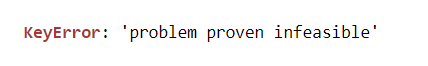

In [7]:
import cvxpy as cp
import numpy as np
import itertools as it

N = 6 
rank = {k : cp.Variable((N, N), boolean=True) for k in range(N)} #звания
clas = {k : cp.Variable((N, N), boolean=True) for k in range(N)} #род войск

cons = []
#условия, что в строке должно быть каждое звание/каждый род войск
for k in range(N):
    cons.append(cp.sum(rank[k], axis=1) == 1)
    cons.append(cp.sum(clas[k], axis=1) == 1)
    
#то же самое на столбцы
for k in range(N):
    cons.append(cp.sum(rank[k], axis=0) == 1)
    cons.append(cp.sum(clas[k], axis=0) == 1)
    
#условия, что не должно быть повторений
for i in range(N):
    for j in range(N):
        cons.append(sum([rank[k][i][j] for k in range(N)]) == 1)
        cons.append(sum([clas[k][i][j] for k in range(N)]) == 1)

# сами латинские квадраты
rank_square = cp.Variable((N, N))
clas_square = cp.Variable((N, N))
cons.append(rank_square == sum(k * rank[k] for k in range(N)))
cons.append(clas_square == sum(k * clas[k] for k in range(N)))

#комбинация двух квадратов
ort = cp.Variable((N, N))
cons.append(ort == 10 * rank_square + clas_square)

indexes = [(i, j) for i in range(N) for j in range(N)]
index_comb = list(it.combinations(indexes, 2))
ort_vec = cp.Variable(len(index_comb))
for key1, key2 in index_comb:
    i1, j1 = key1
    i2, j2 = key2
    n = index_comb.index((key1, key2))
    cons.append(ort_vec[n] == ort[i1][j1] - ort[i2][j2])
    
#условие на ортогональность квадратов
cons.append(ort_vec >= 1)

prob = cp.Problem(cp.Minimize(0), cons)
prob.solve(solver="CBC")




KeyError: 'problem proven infeasible'